## General Framework

EDA aims to analyze the data (either big or relatively small) quickly using general functions. It discovers the inner and outer properties of the data set; how many observation units, variables, missing values, or types of variables, some of the first and last observations… We use the “titanic” data set from Seaborn. To start analyzing data, some helpful functions are:

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [56]:
df = pd.read_csv('titanic.csv')

In [57]:
df.head() # the first 5 observation units

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
df.tail() # the last 5 observation units

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [59]:
df.shape  # the row and column numbers

(891, 15)

In [60]:
df.info() # variables, missing values, types of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [61]:
df.dtypes # types of the variables

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [62]:
df.columns # names of variables

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [63]:
df.index # index information

RangeIndex(start=0, stop=891, step=1)

In [64]:
df.isnull().values.any() # checks whether there are any missing values

np.True_

In [65]:
df.isnull().sum() # missing values of variable

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [66]:
df.describe().T # some statistics such as mean, count, sum, etc.

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


It is important to functionalize the works we do. In Python functions prevent us from repeating ourselves. So let’s construct a general function which concerns the above details for a given data frame:

In [67]:
def check_df(dataframe, head=5,tail=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(tail))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0.05,0.25, 0.50,0.75, 0.95, 0.99]).T)
    print("###################### Unique Values #################")
    print(dataframe.nunique())

In [68]:
check_df(df)

##################### Shape #####################
(891, 15)
##################### Types #####################
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object
##################### Head #####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck

## Analysis of Categorical Variables

There are three types of categorical variables in Python: bool, object, category. To put these variables into a list immediately, we make a comprehension:

In [69]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

In [70]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

Some of the variables are categorical even though their types seem as int64 or float64. To catch such variables, a crucial hint is that they have less than 10 (generally) unique values (number of classes).

In [71]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

In [72]:
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

Except these cases, a categorical variable still may hide. In particular, it may have more than 10 classes ( sometimes there can be enormous number of classes of a categorical variable, such as names of people in a data set). Note that the more classes of a categorical variable, the less information they carry over. Let’s write such variables into a list.

In [73]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]

In [74]:
cat_but_car

[]

In [75]:
cat_cols = cat_cols + num_but_cat # if no variable in cat_but_car
cat_cols = [col for col in cat_cols if col not in cat_but_car] # if there is a variable in cat_but_car

In [76]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

The corresponding data set consisting of categorical variables can be taken:

In [77]:
df[cat_cols].nunique() # number of classes in all variables

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

Next, let’s functionalize the procedures that analyze the categorical variables. We construct a function that takes a data frame, variable name, and plot (default False) as parameters. It counts the number of values of the classes of the given categorical variable and computes the percentages of these classes. If the plot parameter is given True, then the function visualizes the variable by bar plot.

In [78]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name:  
                  dataframe[col_name].value_counts(),
                        "Ratio": 100 * 
        dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

Note that the command “plot” does not work with “bool” type variables. So we convert them into int variables via the “astype” command, then look at the details by the cat_summary function.

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################


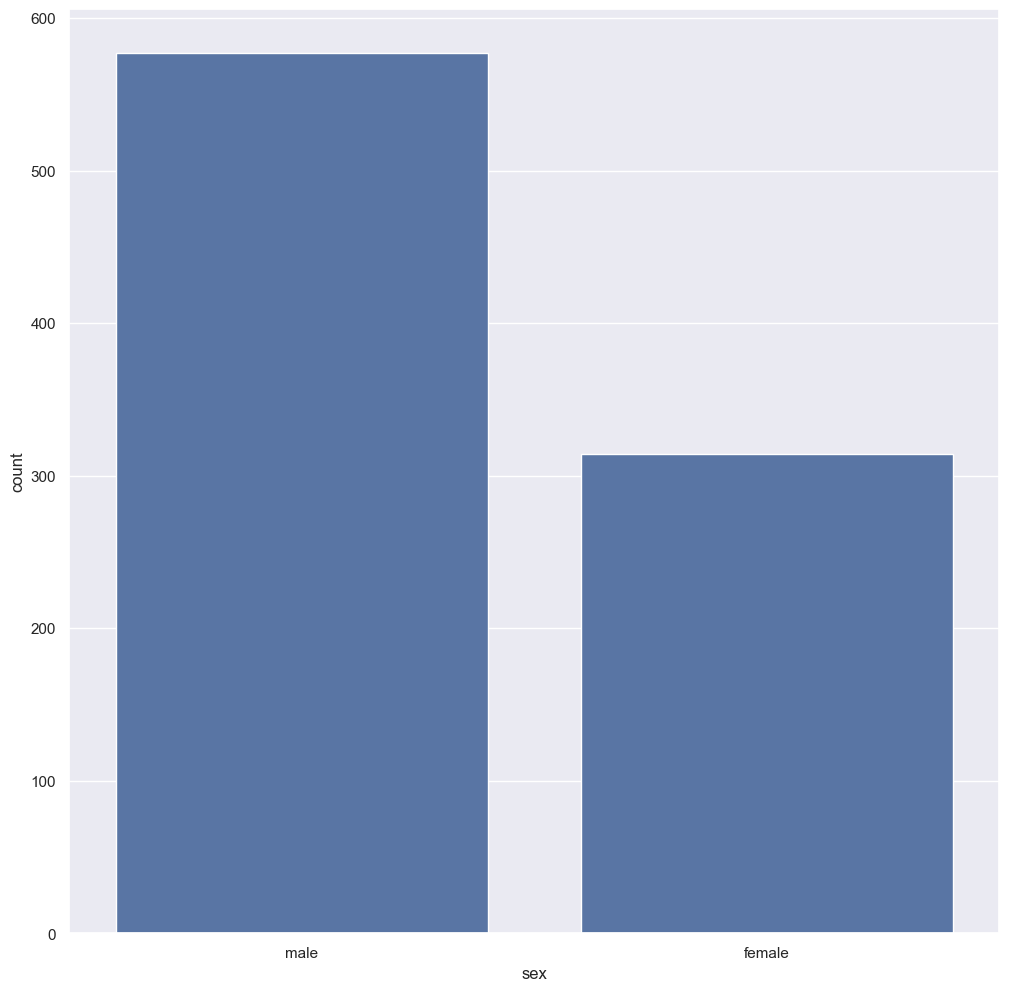

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
##########################################


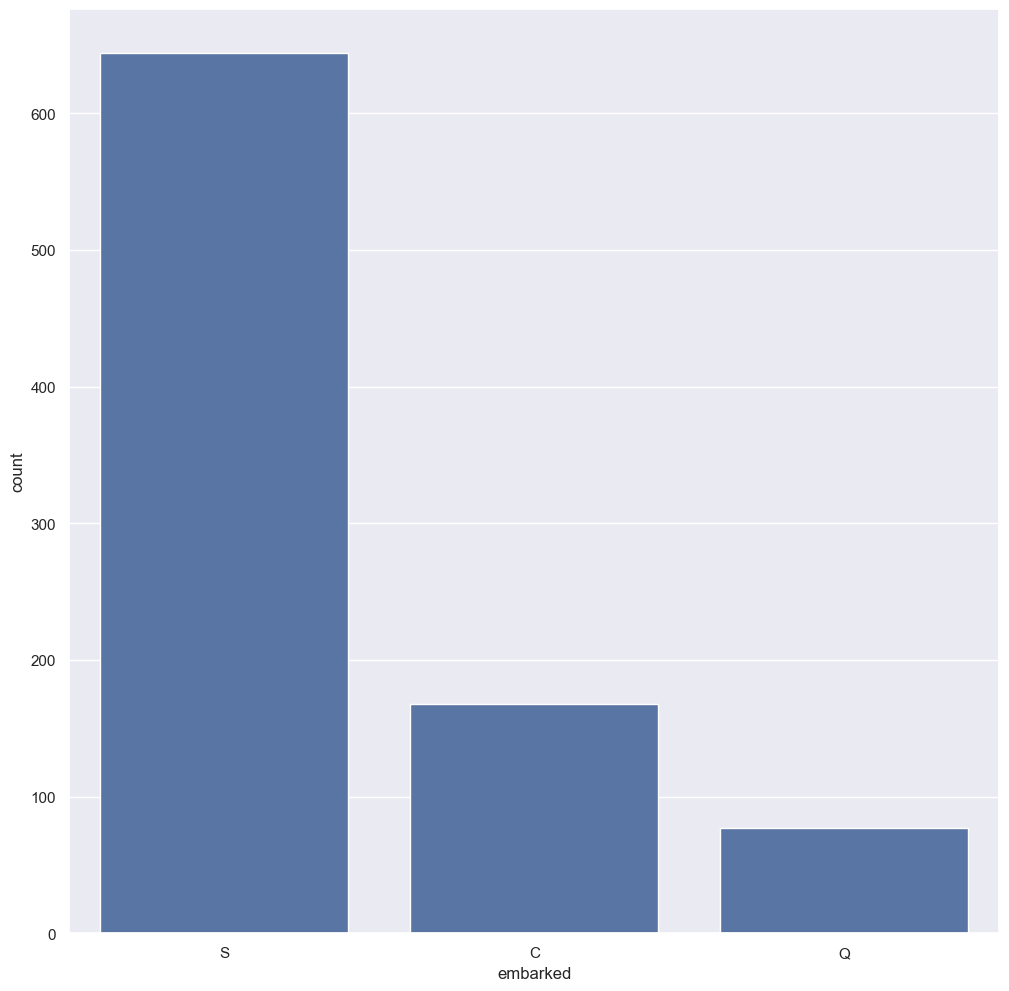

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


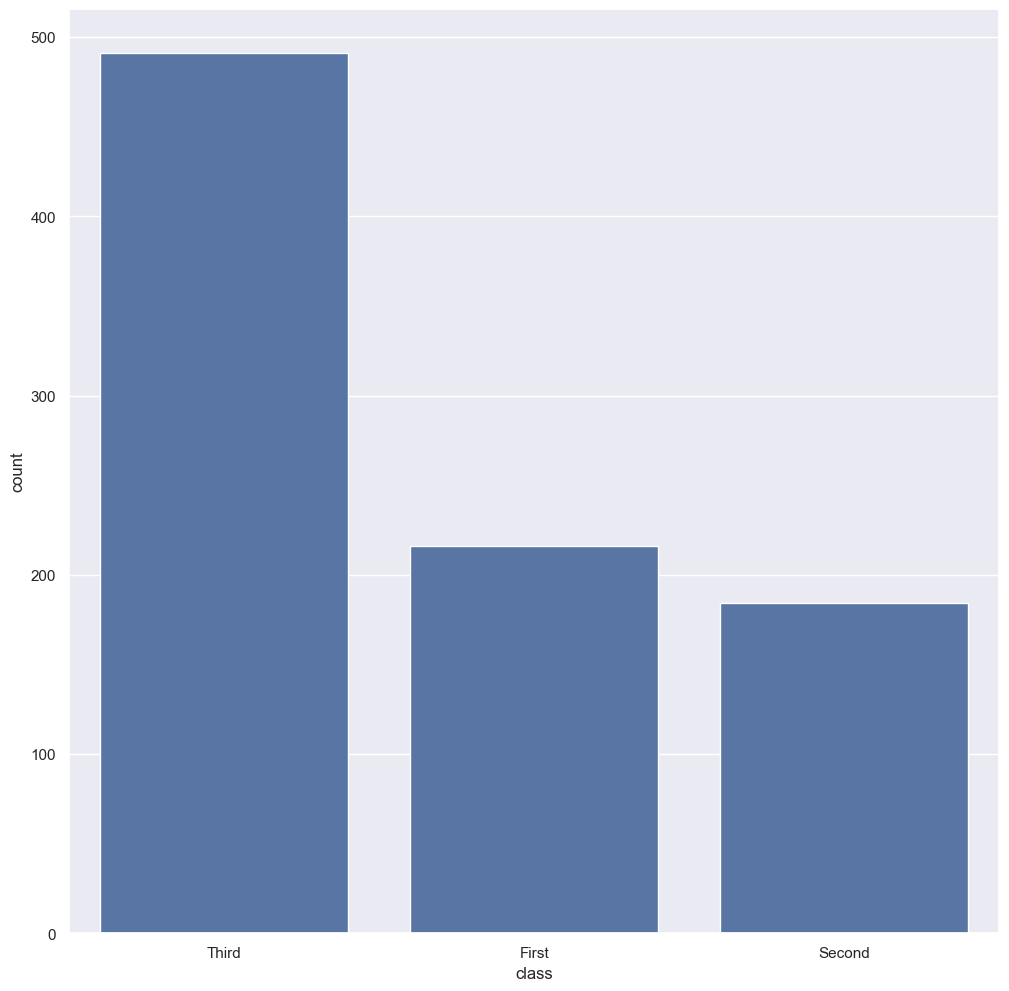

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


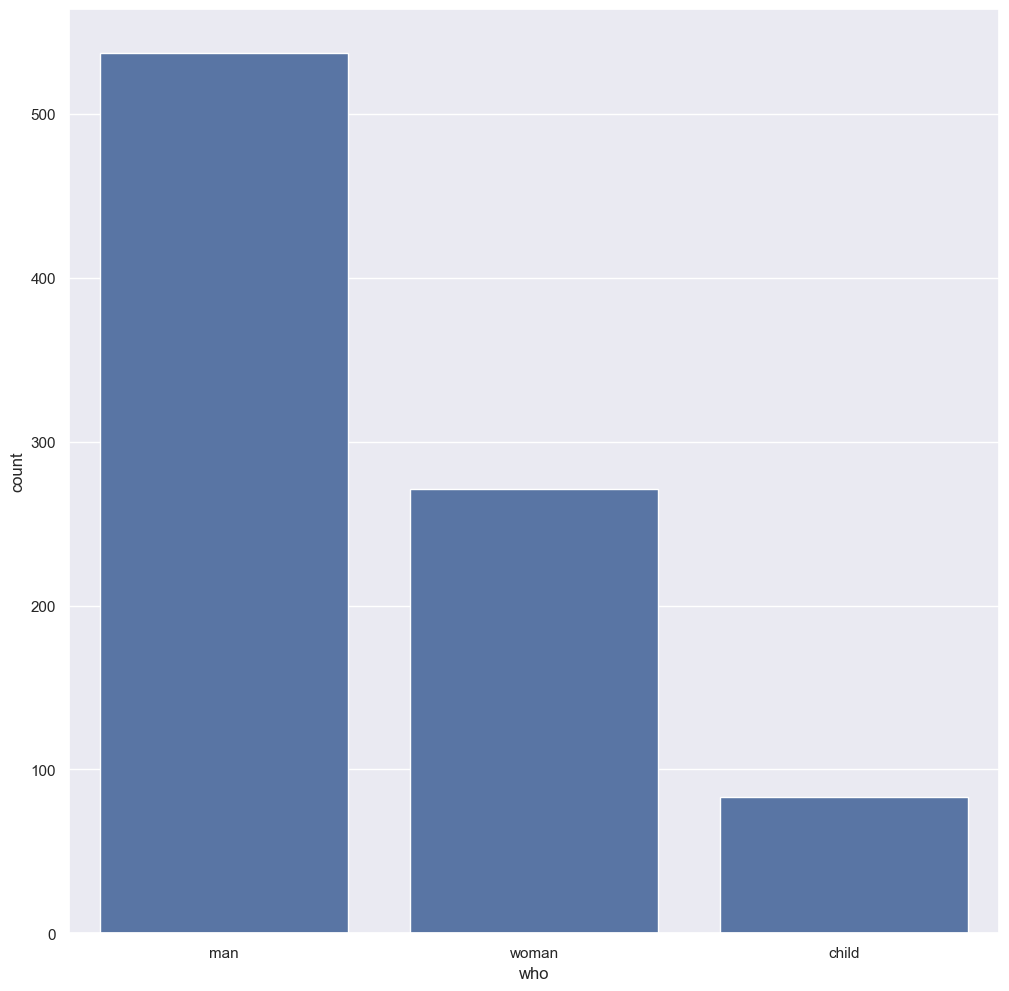

sdfsdfsdfsdfsdfsd
      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
##########################################


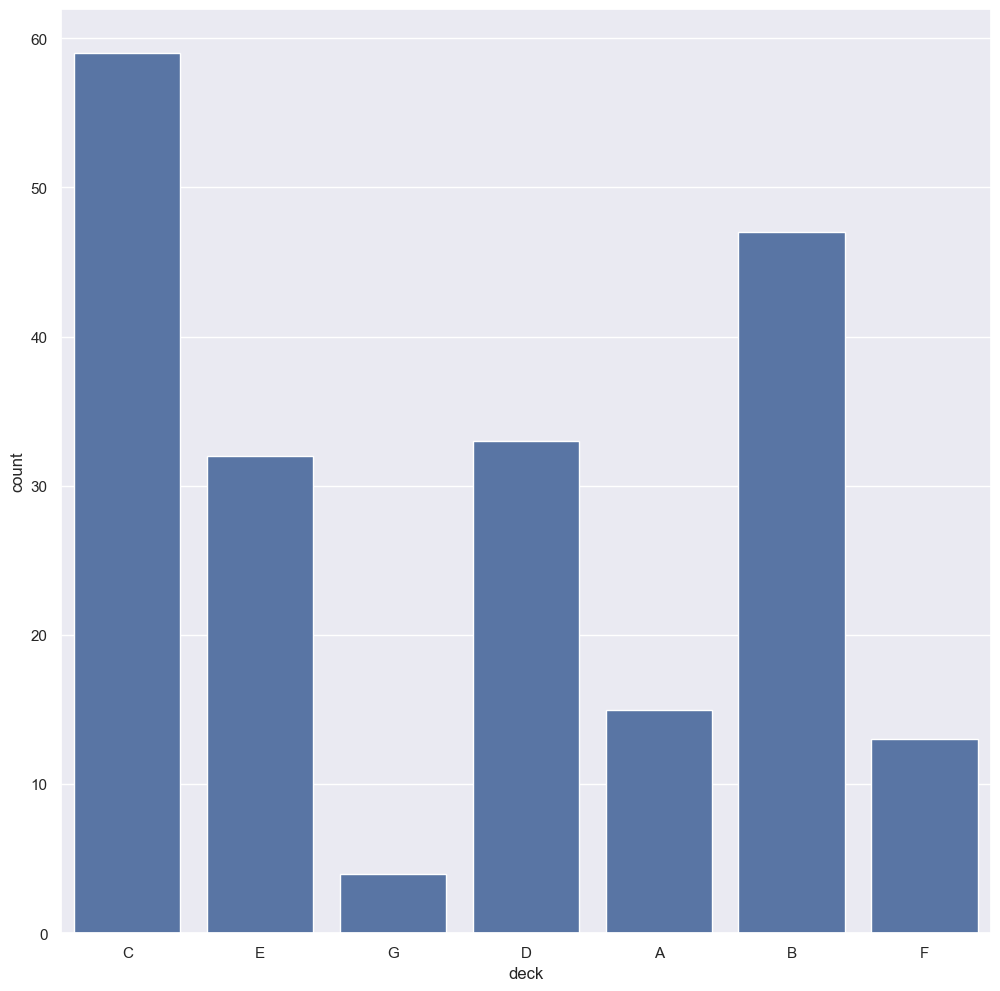

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


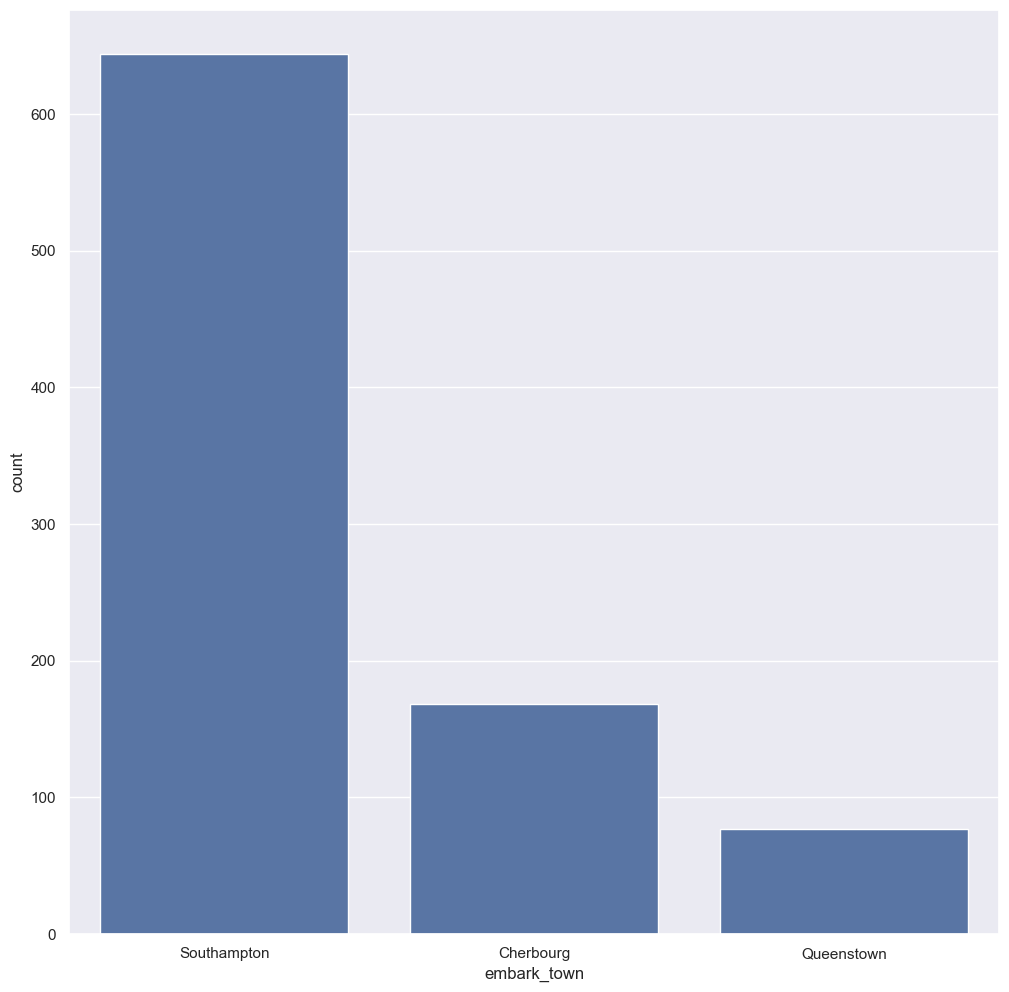

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838
##########################################


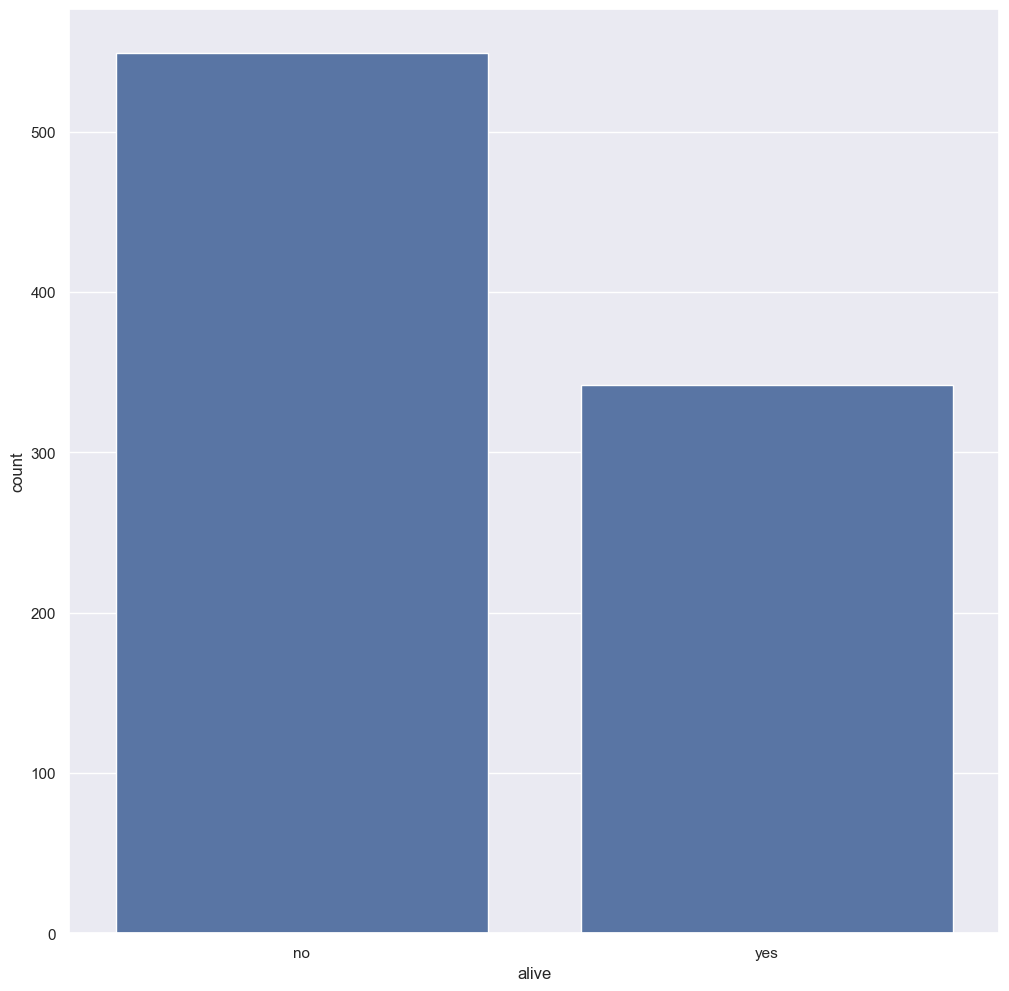

sdfsdfsdfsdfsdfsd
          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838
##########################################


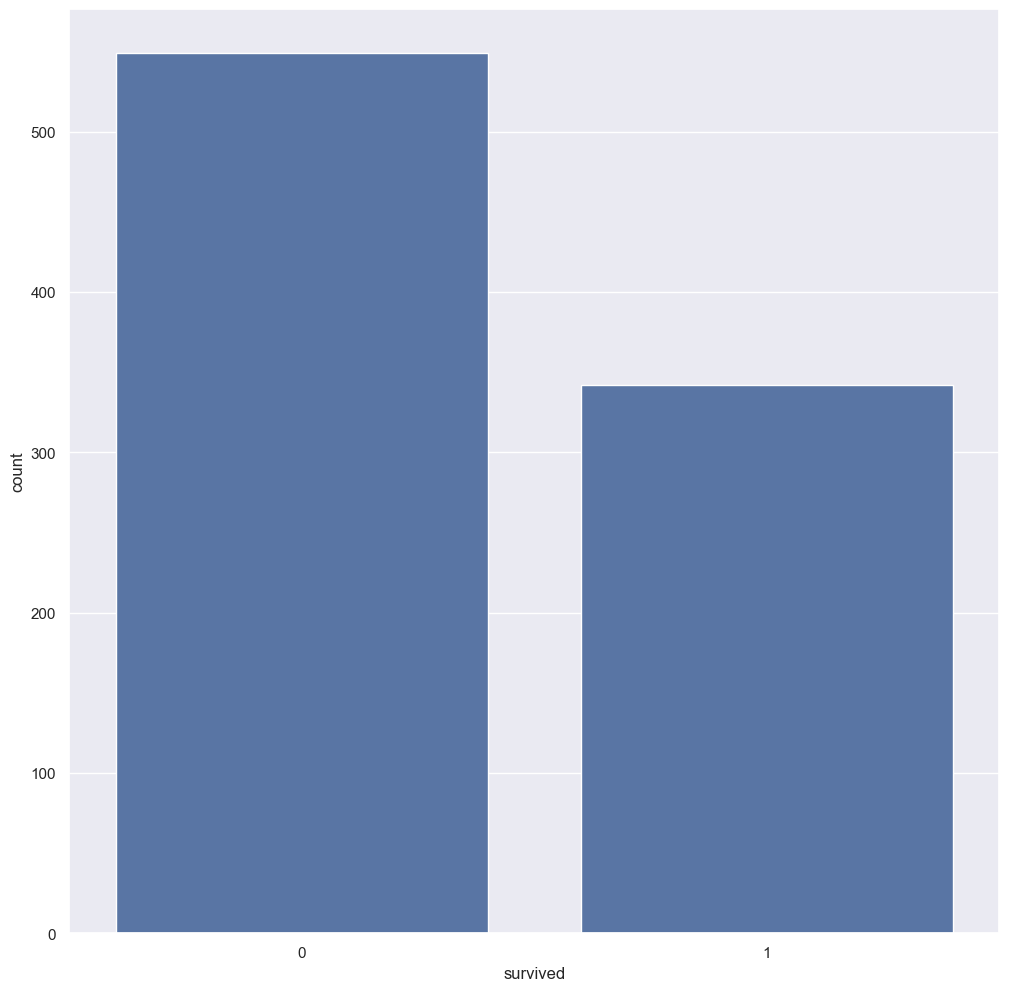

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954
##########################################


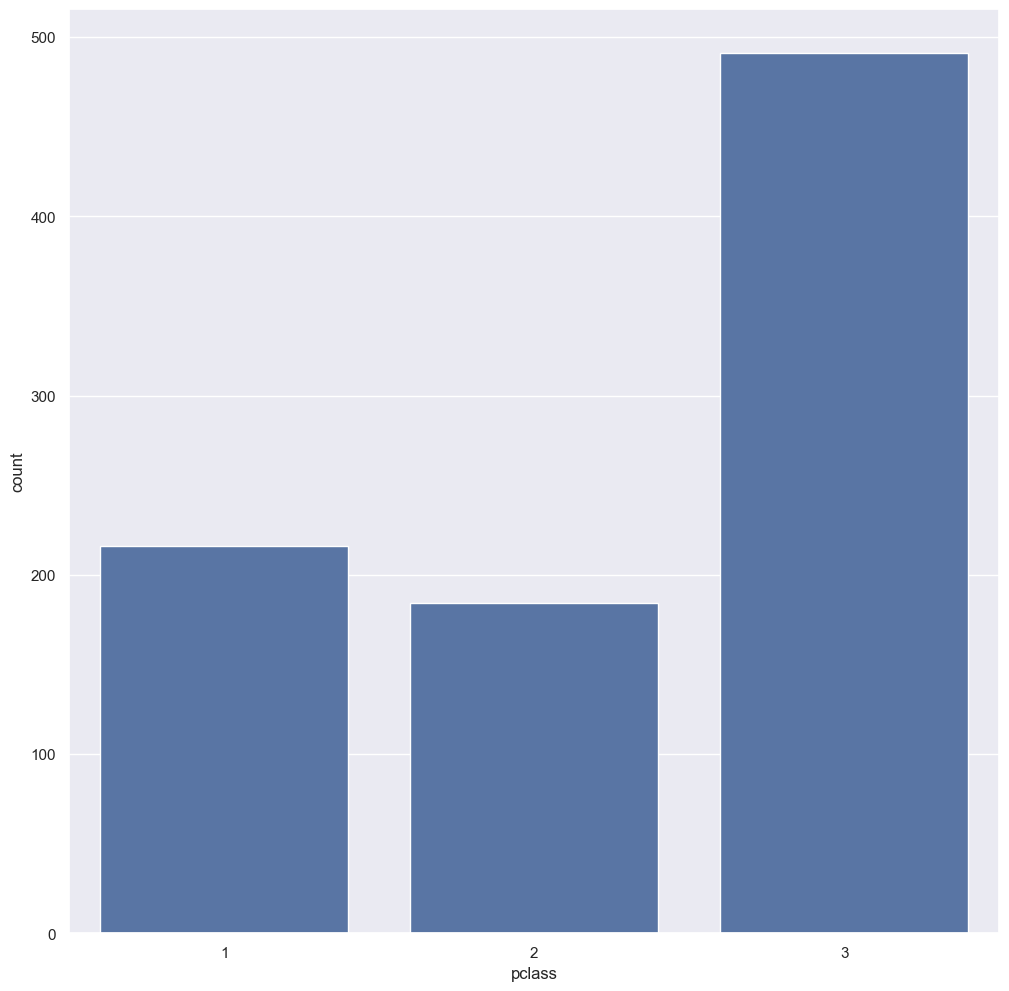

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167
##########################################


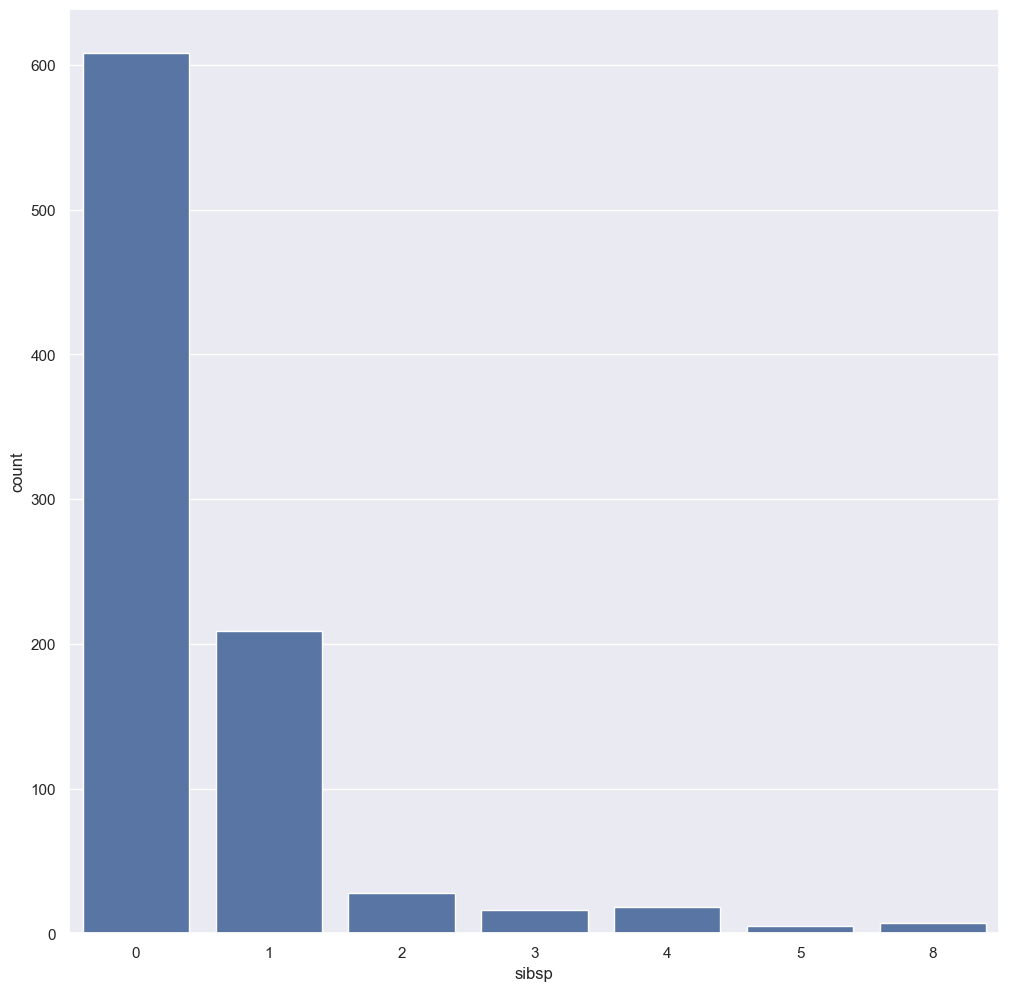

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233
##########################################


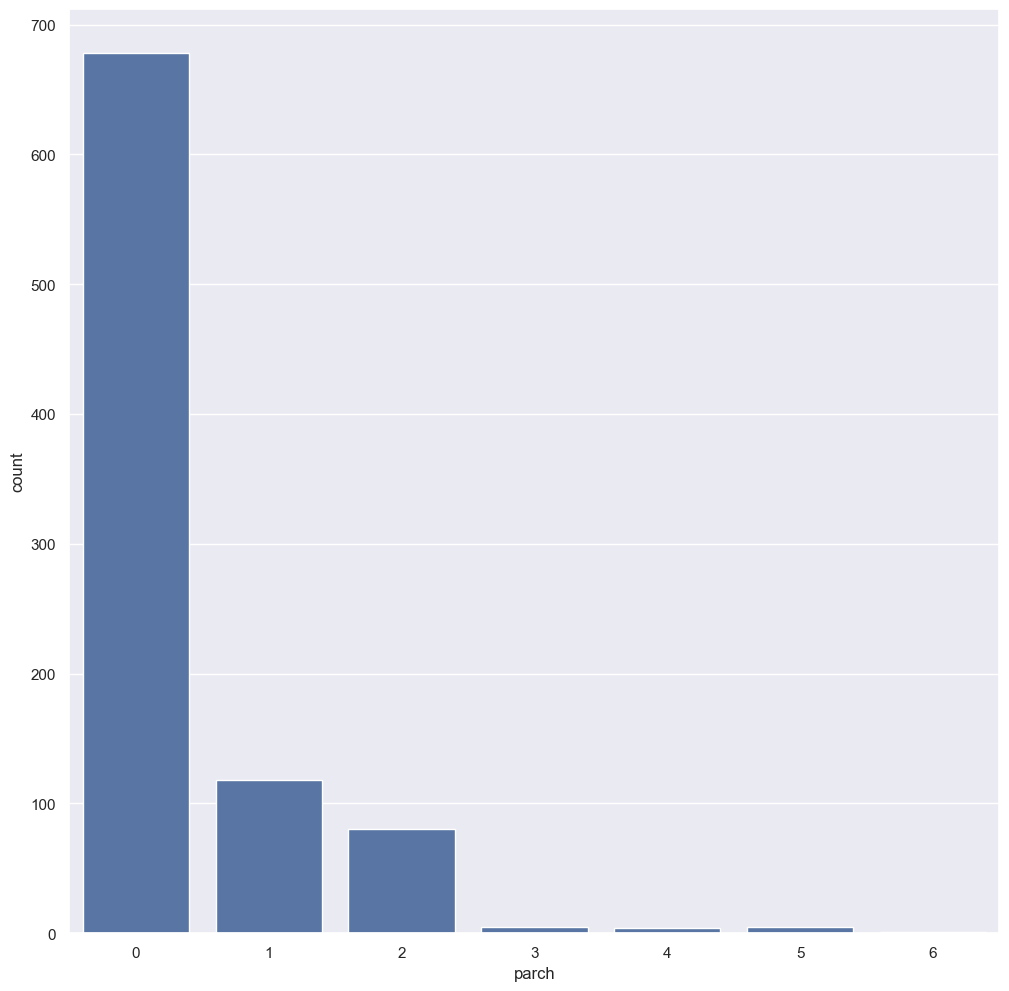

In [79]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        print("sdfsdfsdfsdfsdfsd")
    else:
        cat_summary(df, col, plot=True)

We can do this process with the “bool” type in the beginning while we construct the cat_summary function. Note that it is risky to put more conditions on a function. Don’t forget the principle “Do One Thing” (DOT).

In [80]:
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: 
         dataframe[col_name].value_counts(),
                            "Ratio": 100 * 
         dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: 
        dataframe[col_name].value_counts(),
                            "Ratio": 100 * 
        dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)


        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302
##########################################


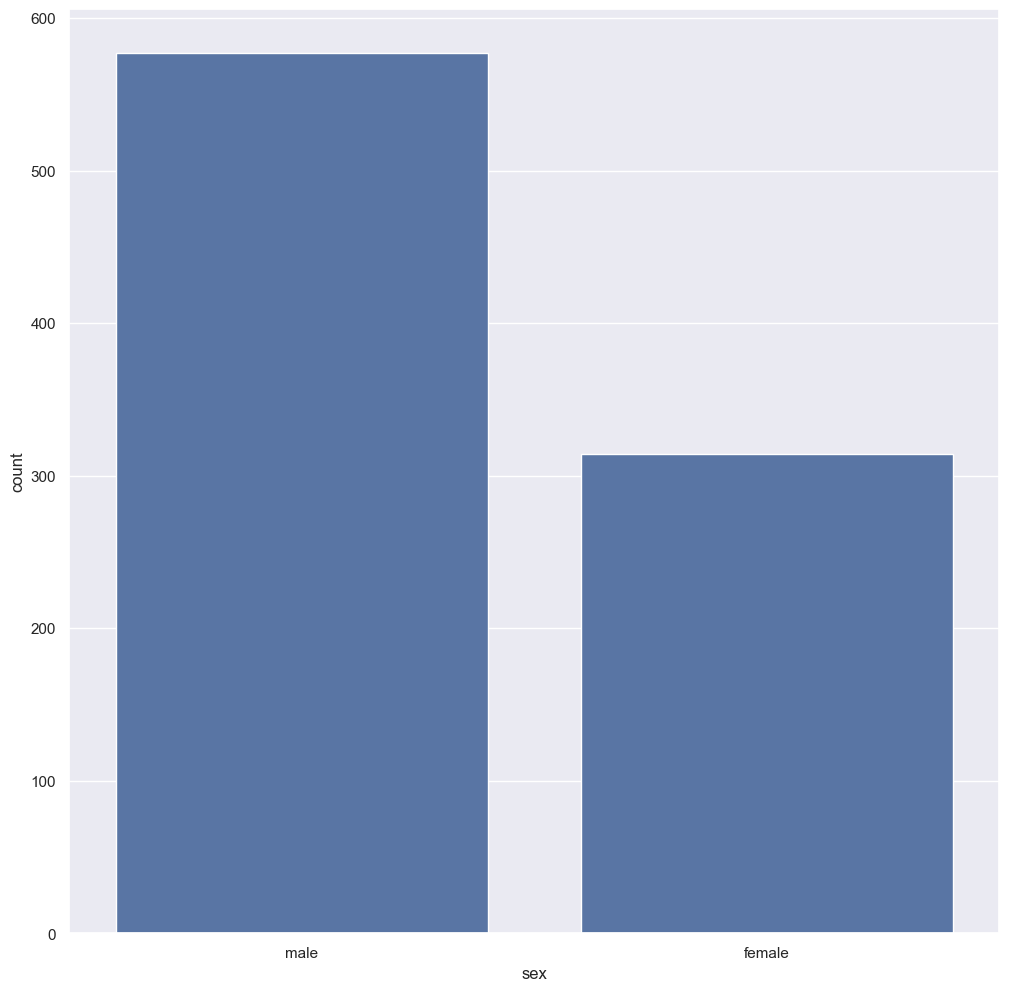

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975
##########################################


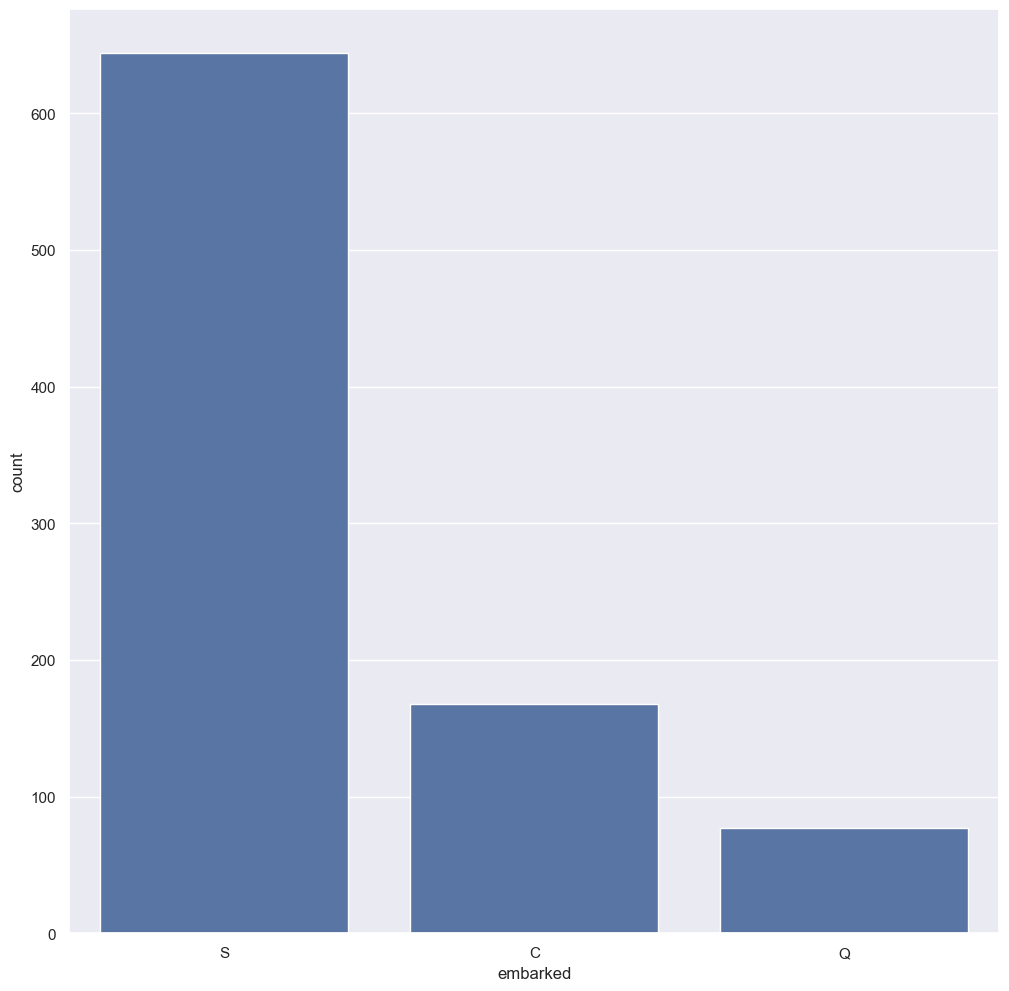

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################


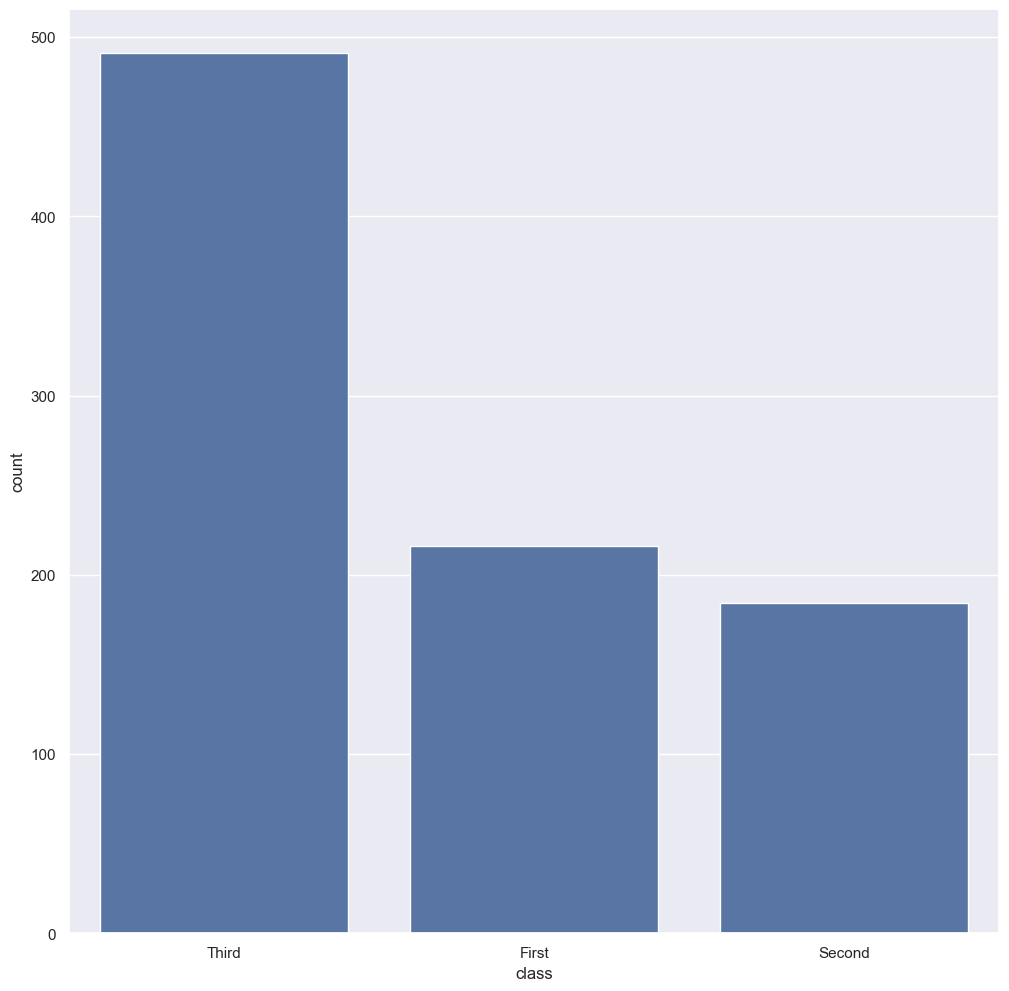

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################


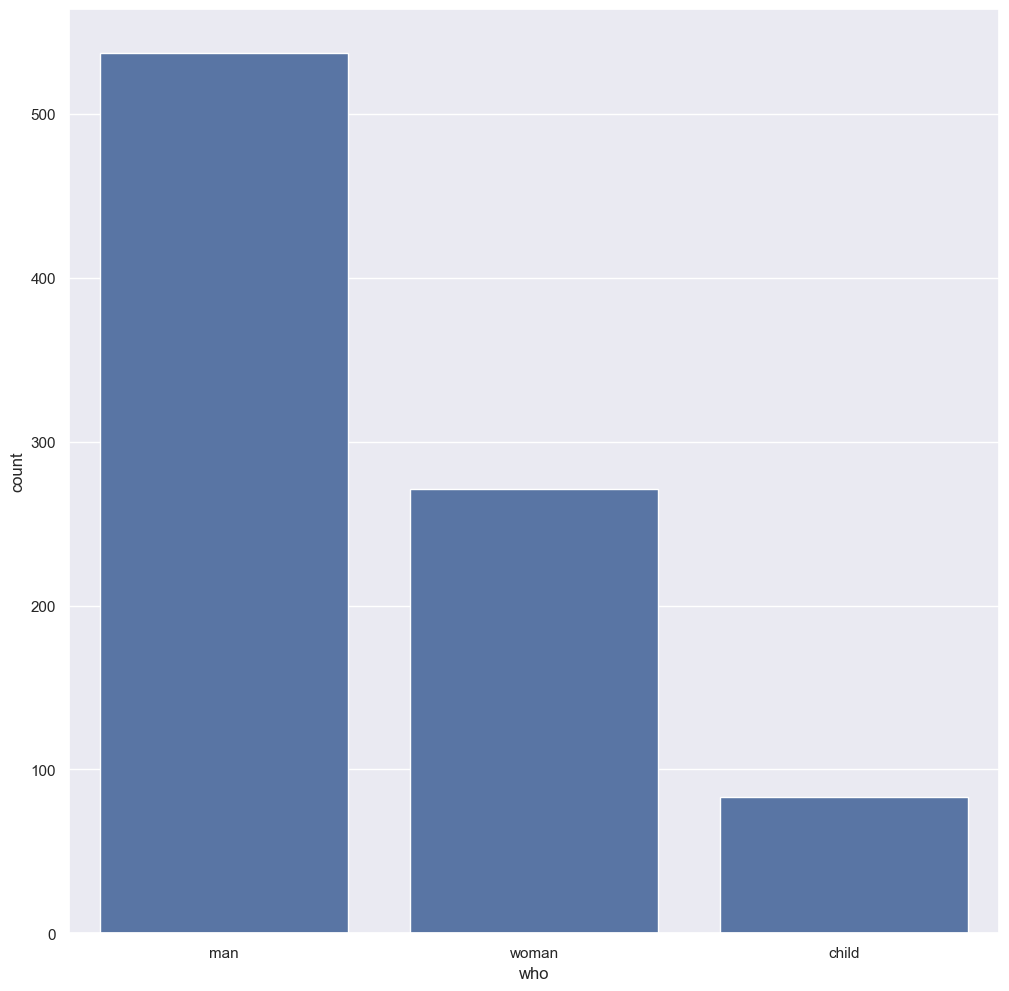

            adult_male     Ratio
adult_male                      
1                  537  60.26936
0                  354  39.73064
##########################################


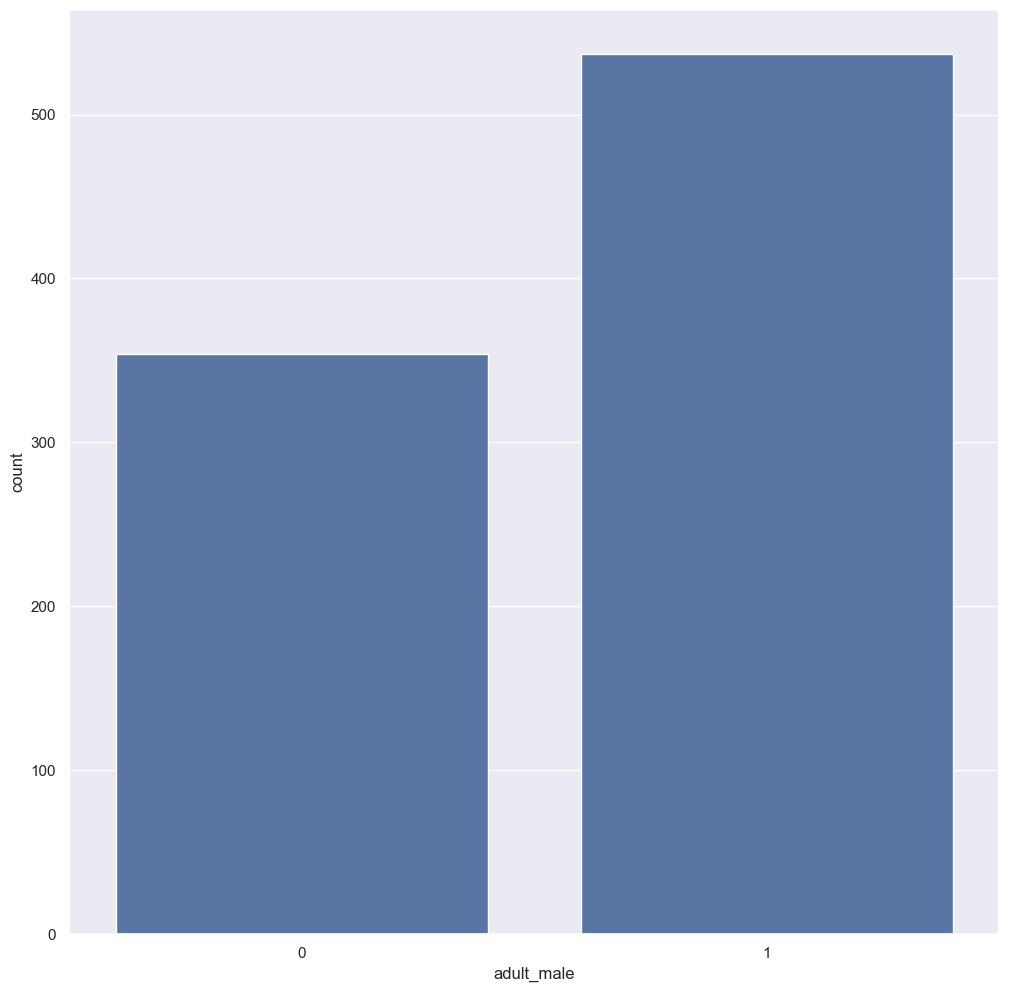

      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934
##########################################


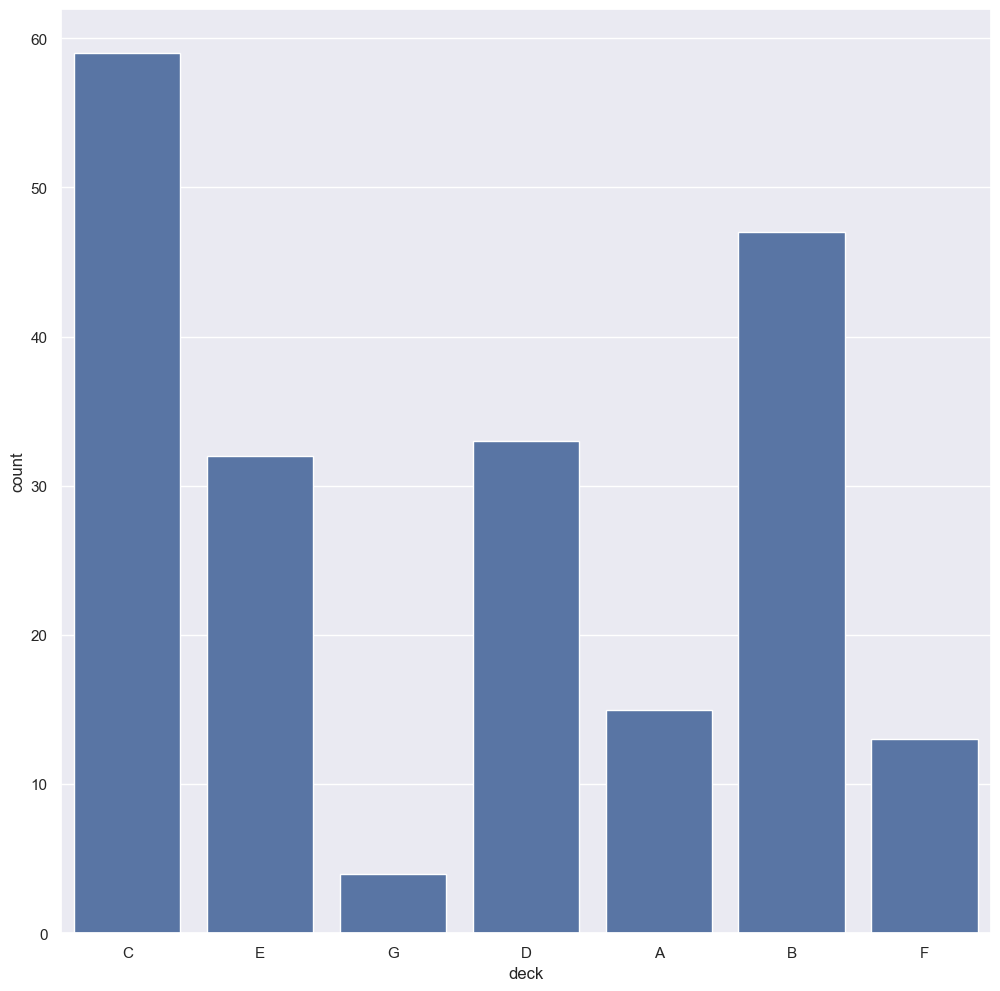

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
##########################################


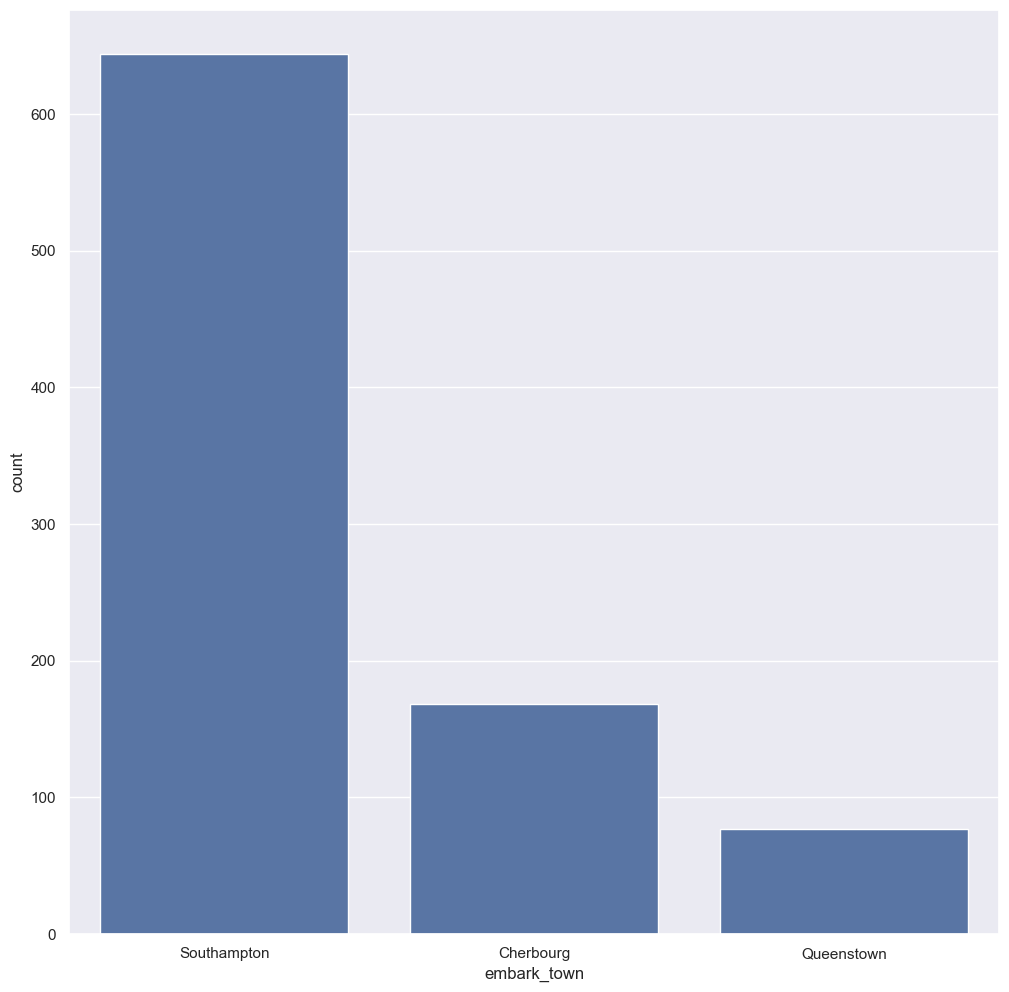

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838
##########################################


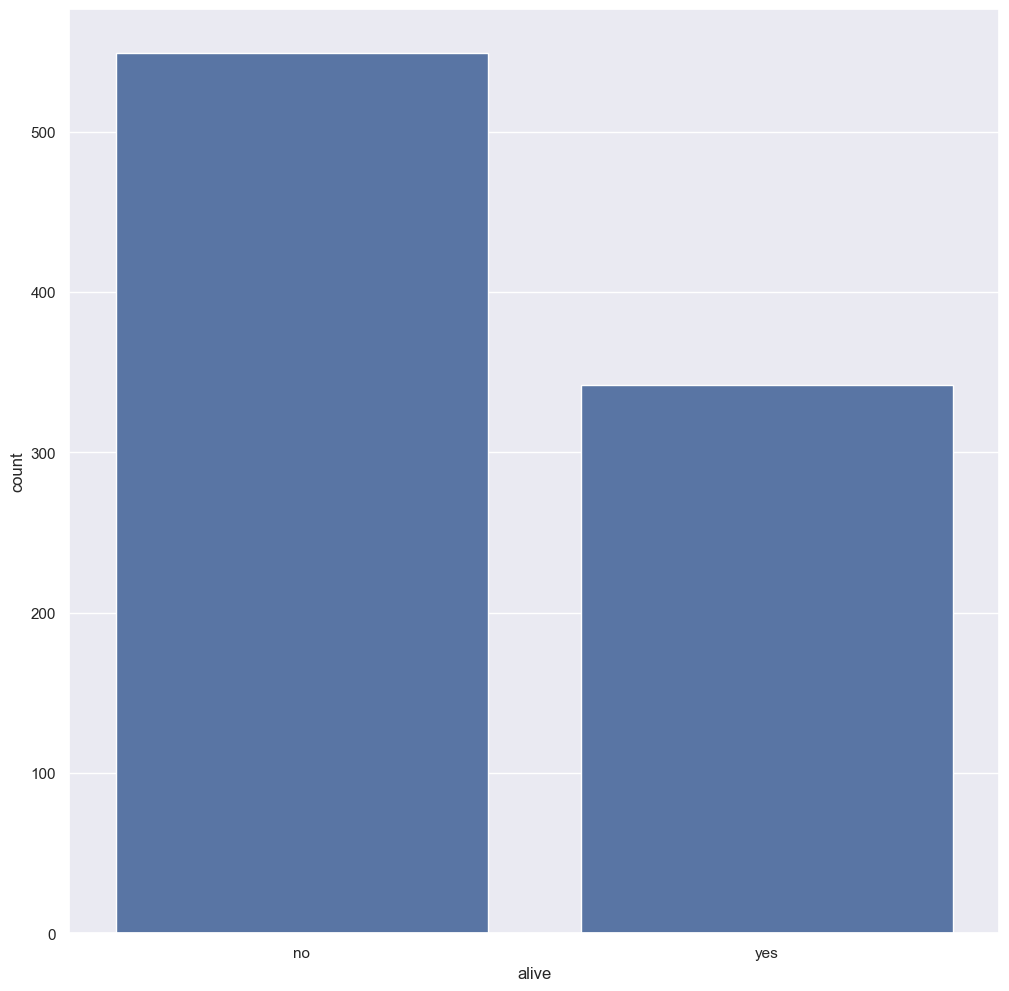

       alone     Ratio
alone                 
1        537  60.26936
0        354  39.73064
##########################################


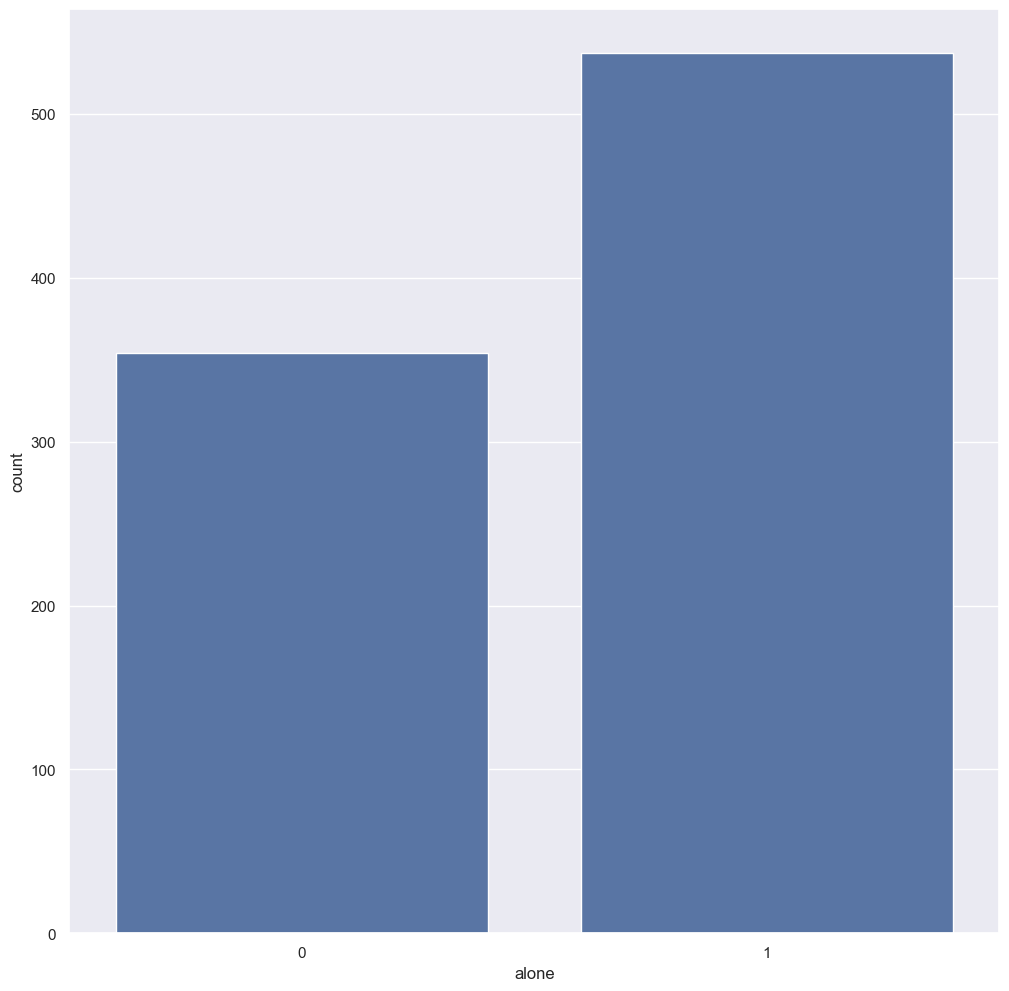

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838
##########################################


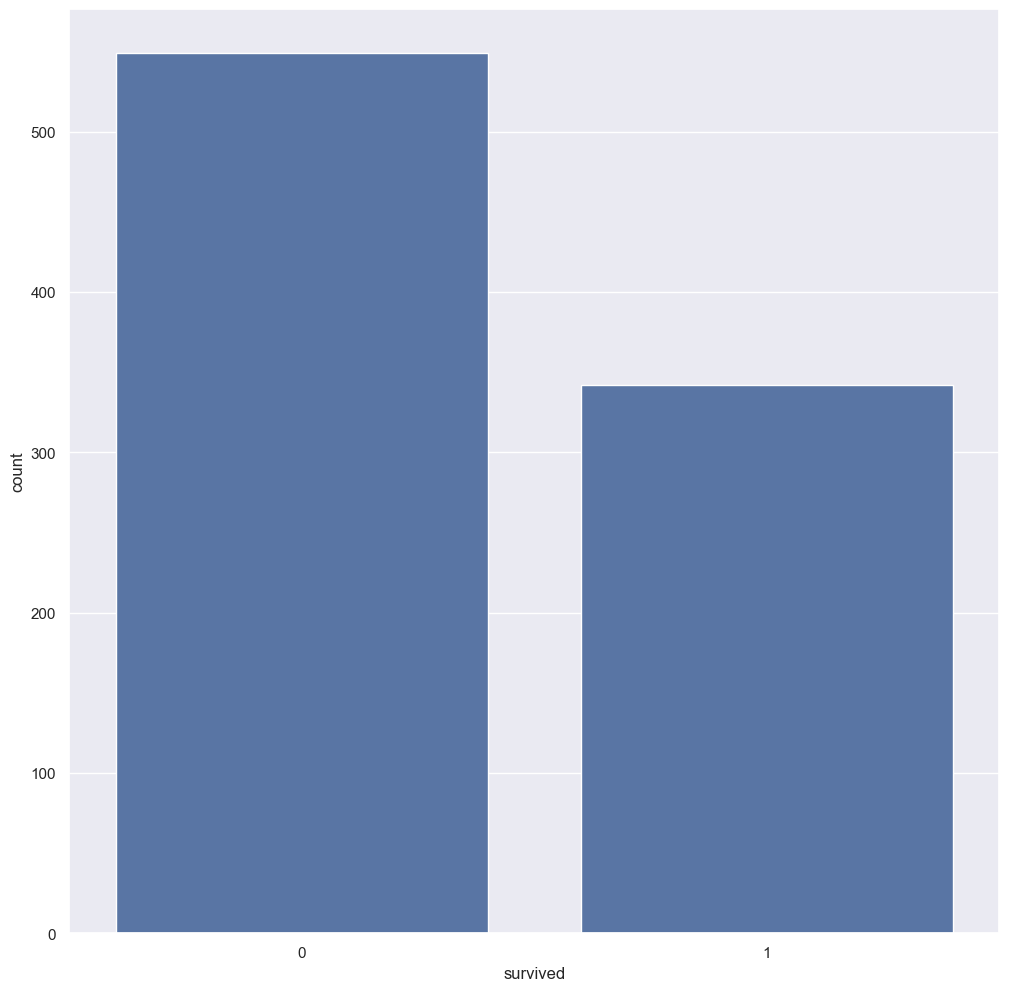

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954
##########################################


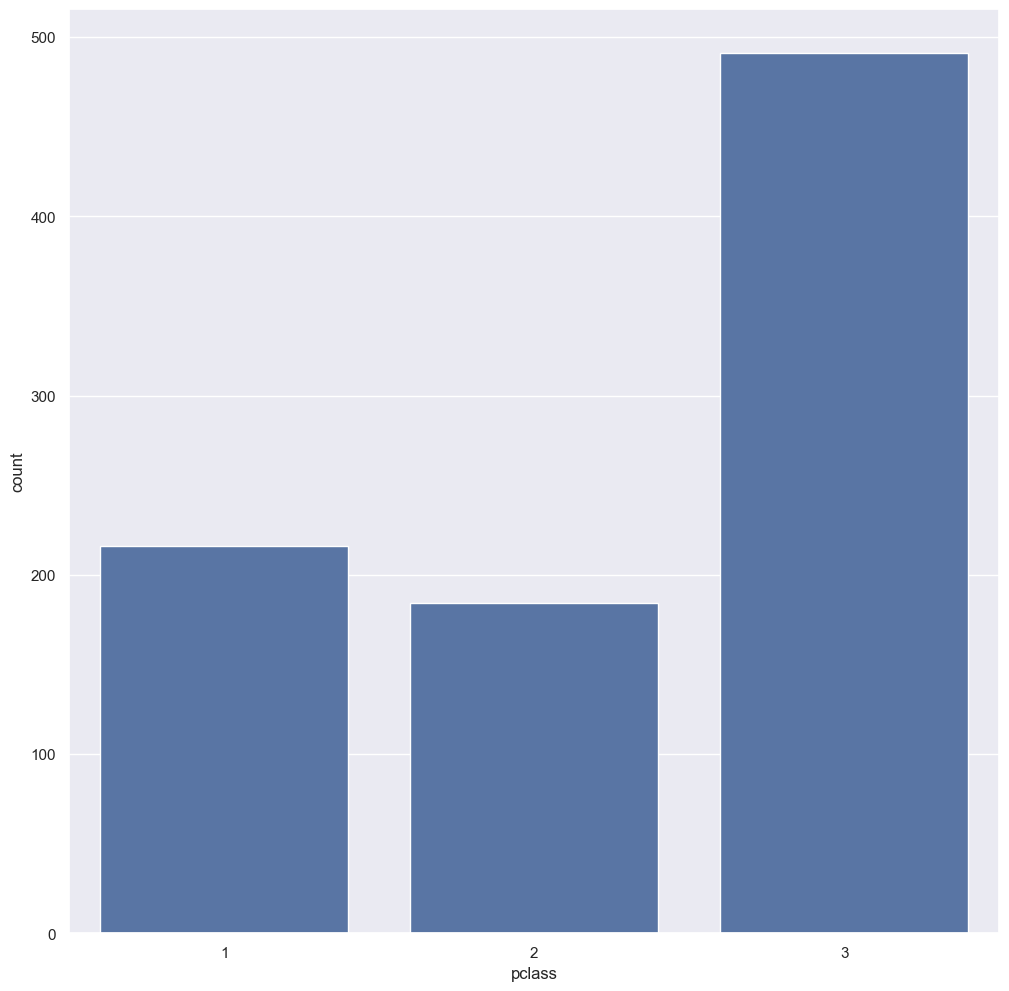

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167
##########################################


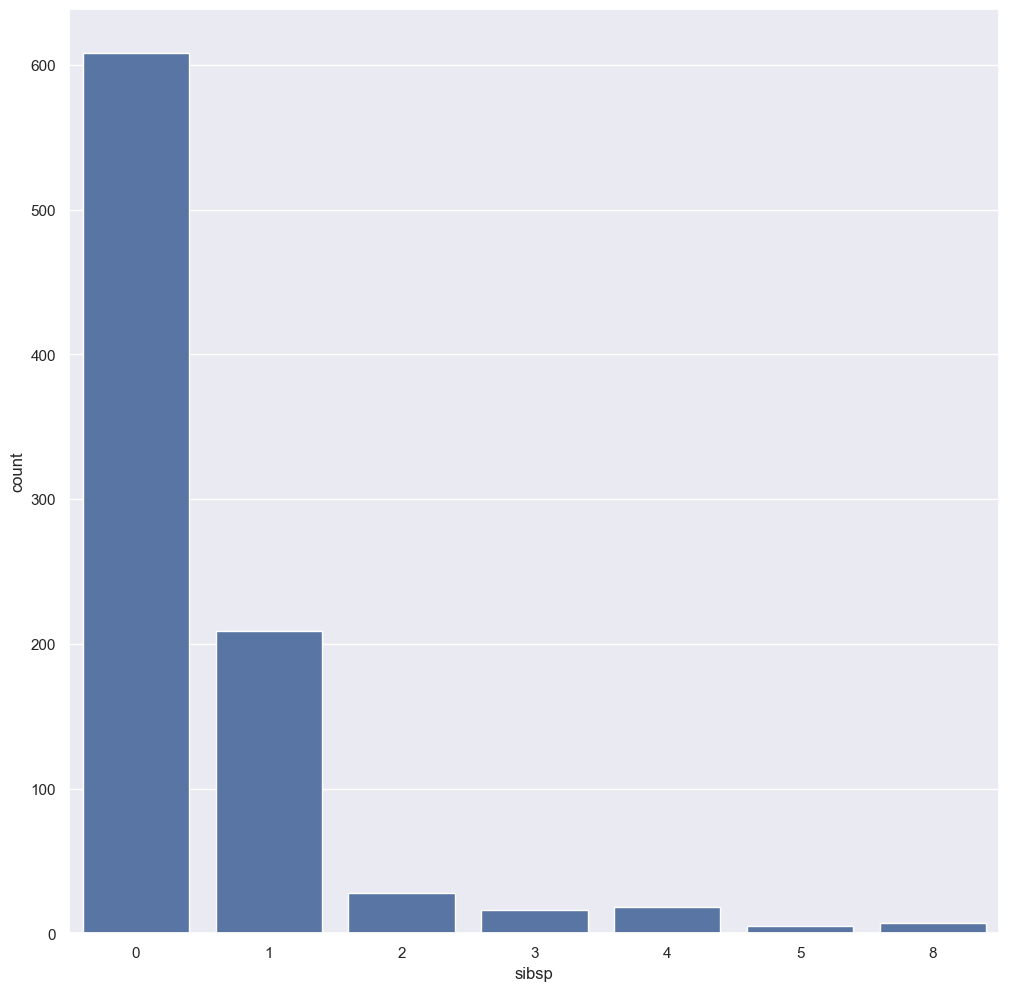

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233
##########################################


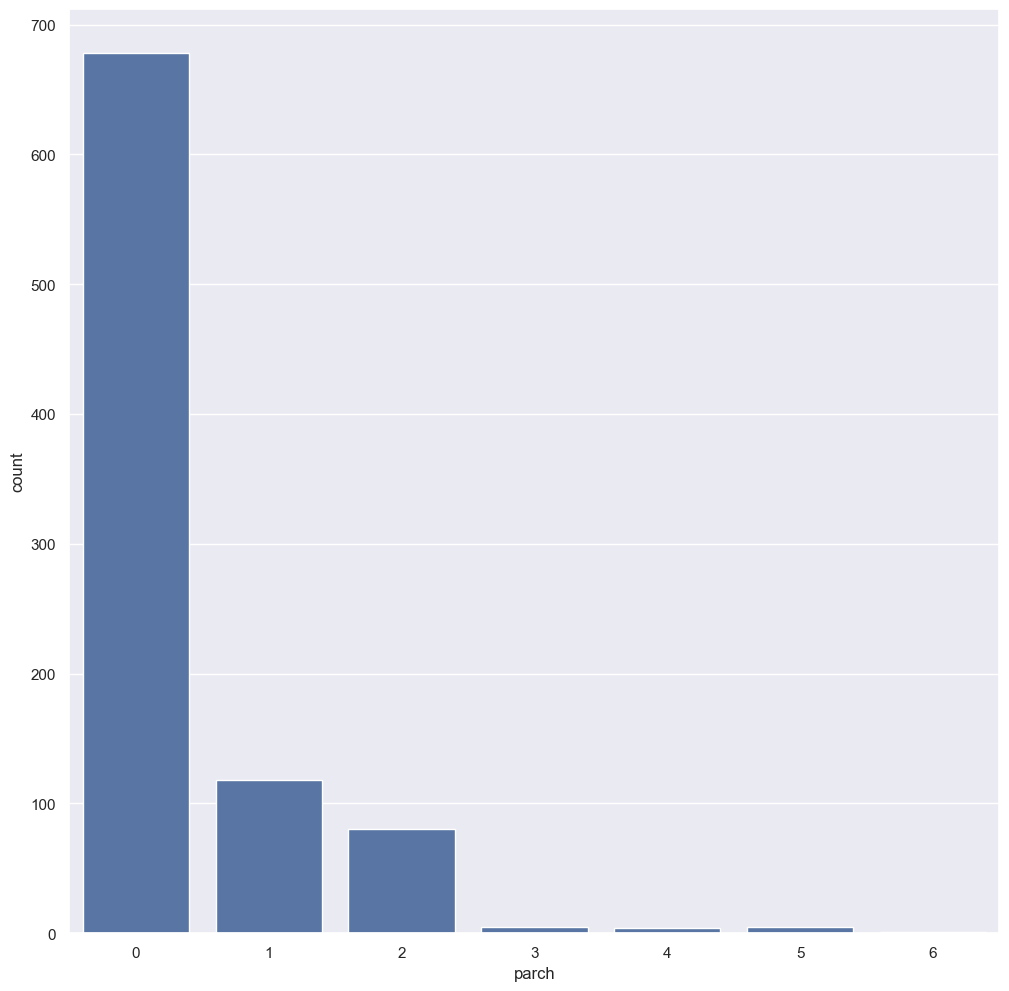

In [81]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

## Analysis of Numerical Variables

How to take numeric variables from a data set:

In [82]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['age', 'fare']

We may construct a general function that analyzes the numerical variables of a given data frame. The function has a data frame, variable name, and plot(default False) as parameters. It gives some statistical values (beyond the standard values, our function computes some quantiles) of the variables and draws a histogram if the plot parameter is True.

In [83]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70,  
    0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

Let’s apply the num_summary function to each numerical variable.

In [84]:
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


## Capturing Variables and Generalizing Operations

To make other people understand the functions we constructed, we put a docstring into it. A docstring carries information about the parameters, outputs, and mission of a function. It is written in-between “““..”””, and the command “help(function_name)” gives the docstring of the function.

Next, we will write a function that describes and groups the types of variables of a data frame. We will add a docstring to it. It will summarize the things we mentioned above.

In [85]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    It gives the names of categorical, numerical, and categorical 
    but cardinal variables.
    Parameters
    ----------
    dataframe: dataframe
        The data frame from which we want to take variables 
    cat_th: int, float 
        The threshold for the number of classes of numerical but
        categorical variables 
    car_th: int, float
        The threshold for the number of classes of cardinal but
        categorical variables
    Returns
    -------
    cat_cols: list
        List of categorical variables
    num_cols: list
        List of numerical variables    
    cat_but_car: list
        List of cardinal but categorical variables
    Notes
    ------
    cat_cols + num_cols + cat_but_car = total number of variables
    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns 
    if   str(dataframe[col].dtypes) in ["category", "object",  
    "bool"]]
    num_but_cat = [col for col in dataframe.columns if
    dataframe[col].nunique() < 10 and dataframe[col].dtypes in 
    ["int", "float"]]
    cat_but_car = [col for col in dataframe.columns if
                    dataframe[col].nunique() > 20 and 
    str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if 
    dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [86]:
grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 6


(['sex',
  'embarked',
  'class',
  'who',
  'deck',
  'embark_town',
  'alive',
  'survived',
  'pclass',
  'sibsp',
  'parch',
  'adult_male',
  'alone'],
 ['age', 'fare'],
 [])

## Analysis of Target Variable

In a given data set, “target variable” is the variable whose values are to be modeled and predicted by other variables.

## Analysis of Target Variable with Categorical Variables

In [87]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": 
    dataframe.groupby(categorical_col)[target].mean()}), 
    end="\n\n\n")

# apply this function to all categorical variables
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957


        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363


       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458


            TARGET_MEAN
adult_male             
0              0.717514
1              0.163873


      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000


             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957


       TARGET_MEAN
alive             
no             0.0
yes            1.0


       TARGET_MEAN
alone             
0         0.505650
1         0.303538


          TARGET_MEAN
survived             
0                 

## Analysis of Target Variable with Numerical Variables

In [88]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), 
    end="\n\n\n")
# apply this function to all numerical variables
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




## Analysis of Correlation

Correlation is any statistical relationship, whether causal or not. It describes the strength of an association between two variables and is completely symmetrical. The value of a correlation coefficient ranges between -1 and +1. The correlation coefficient is +1 in the case of a perfect direct (increasing) linear relationship (correlation), −1 in the case of a perfect inverse (decreasing) linear relationship (anti-correlation), and some value in the interval (−1,1) in all other cases, indicating the degree of the linear relationship between the variables. As it approaches zero there is less of a relationship (closer to uncorrelated). The closer the coefficient is to either −1 or 1, the stronger the correlation between the variables.

Let’s compute the correlation coefficients between numerical variables. The function corr() does it.

In [89]:
num_cols = [col for col in df.columns if df[col].dtype in [int, float]]
corr = df[num_cols].corr()
corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


To draw heat map:

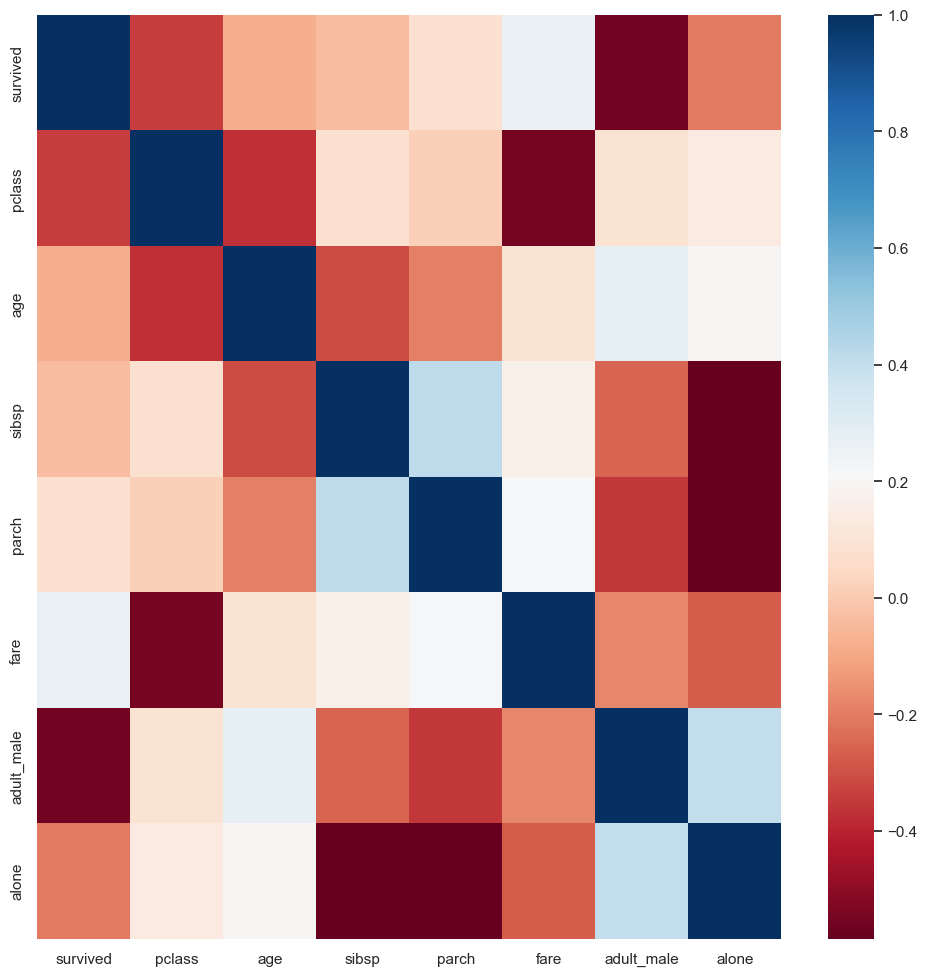

In [90]:
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu")
plt.show()


To make all correlation coefficients positive:

In [91]:
corr_matrix = corr.abs()
corr_matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651,0.253586,0.584471
parch,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225,0.349943,0.583398
fare,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000,0.182024,0.271832
adult_male,0.557080,0.094035,0.280328,0.253586,0.349943,0.182024,1.000000,0.404744
alone,0.203367,0.135207,0.198270,0.584471,0.583398,0.271832,0.404744,1.000000


As it is symmetric, we use the following in order to get rid of the multiple values:

In [92]:
upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_triangle_matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,NaN,0.338481,0.077221,0.035322,0.081629,0.257307,0.557080,0.203367
pclass,NaN,NaN,0.369226,0.083081,0.018443,0.549500,0.094035,0.135207
age,NaN,NaN,NaN,0.308247,0.189119,0.096067,0.280328,0.198270
sibsp,NaN,NaN,NaN,NaN,0.414838,0.159651,0.253586,0.584471
parch,NaN,NaN,NaN,NaN,NaN,0.216225,0.349943,0.583398
fare,NaN,NaN,NaN,NaN,NaN,NaN,0.182024,0.271832
adult_male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.404744
alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To delete highly correlated variables:

In [93]:
drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col]>0.90) ]
corr_matrix[drop_list]
df.drop(drop_list, axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,NaN,Southampton,no,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,0,NaN,Southampton,no,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1


We may construct a general function which analysis correlation between data frame and gives the highly correlated variables:

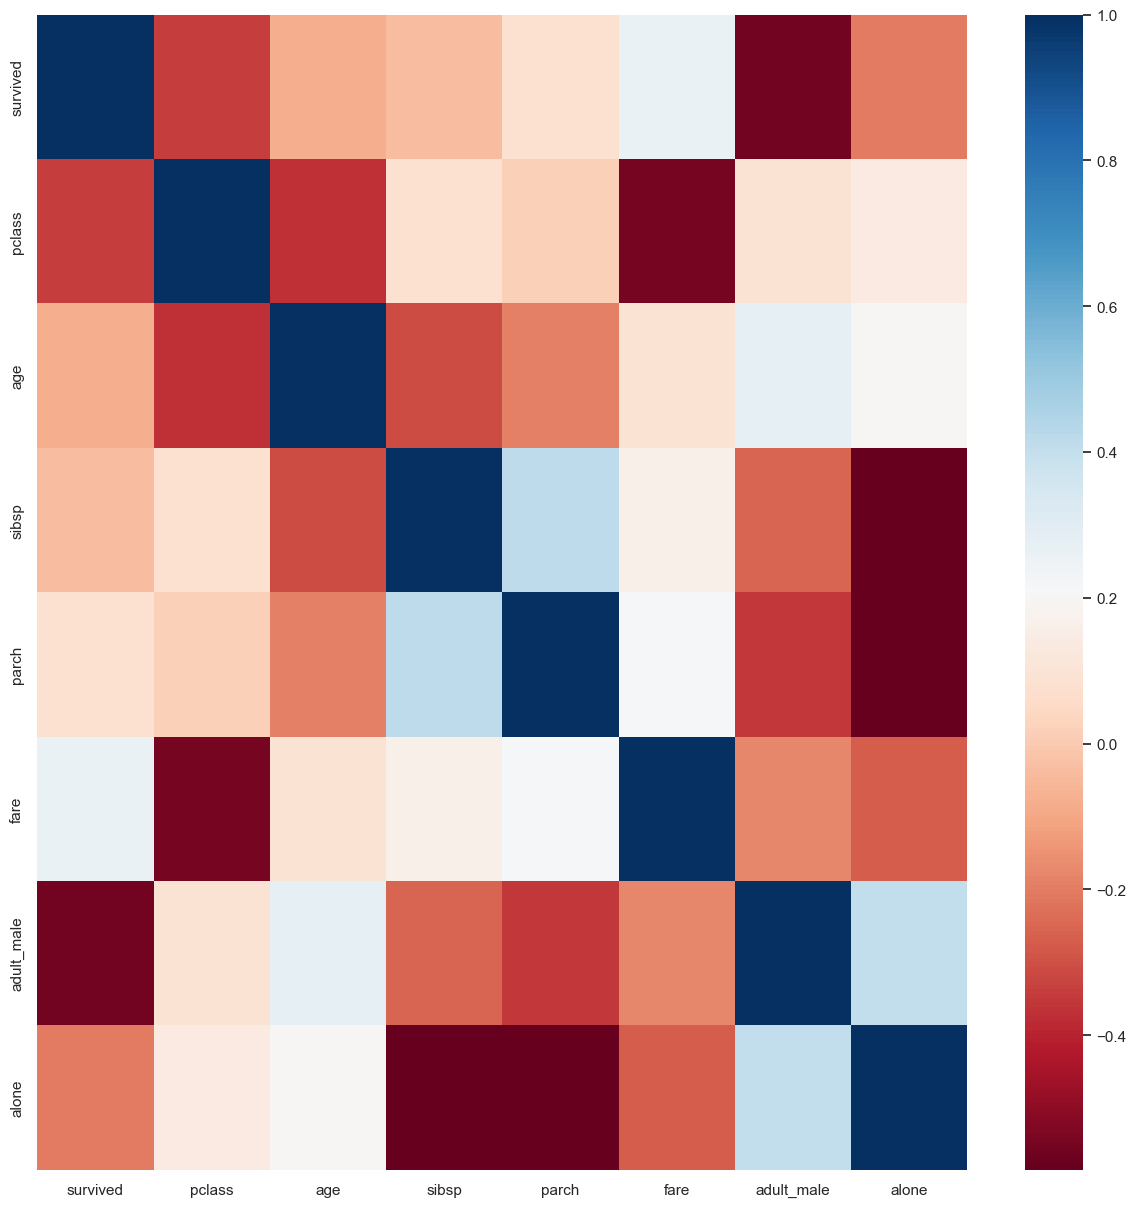

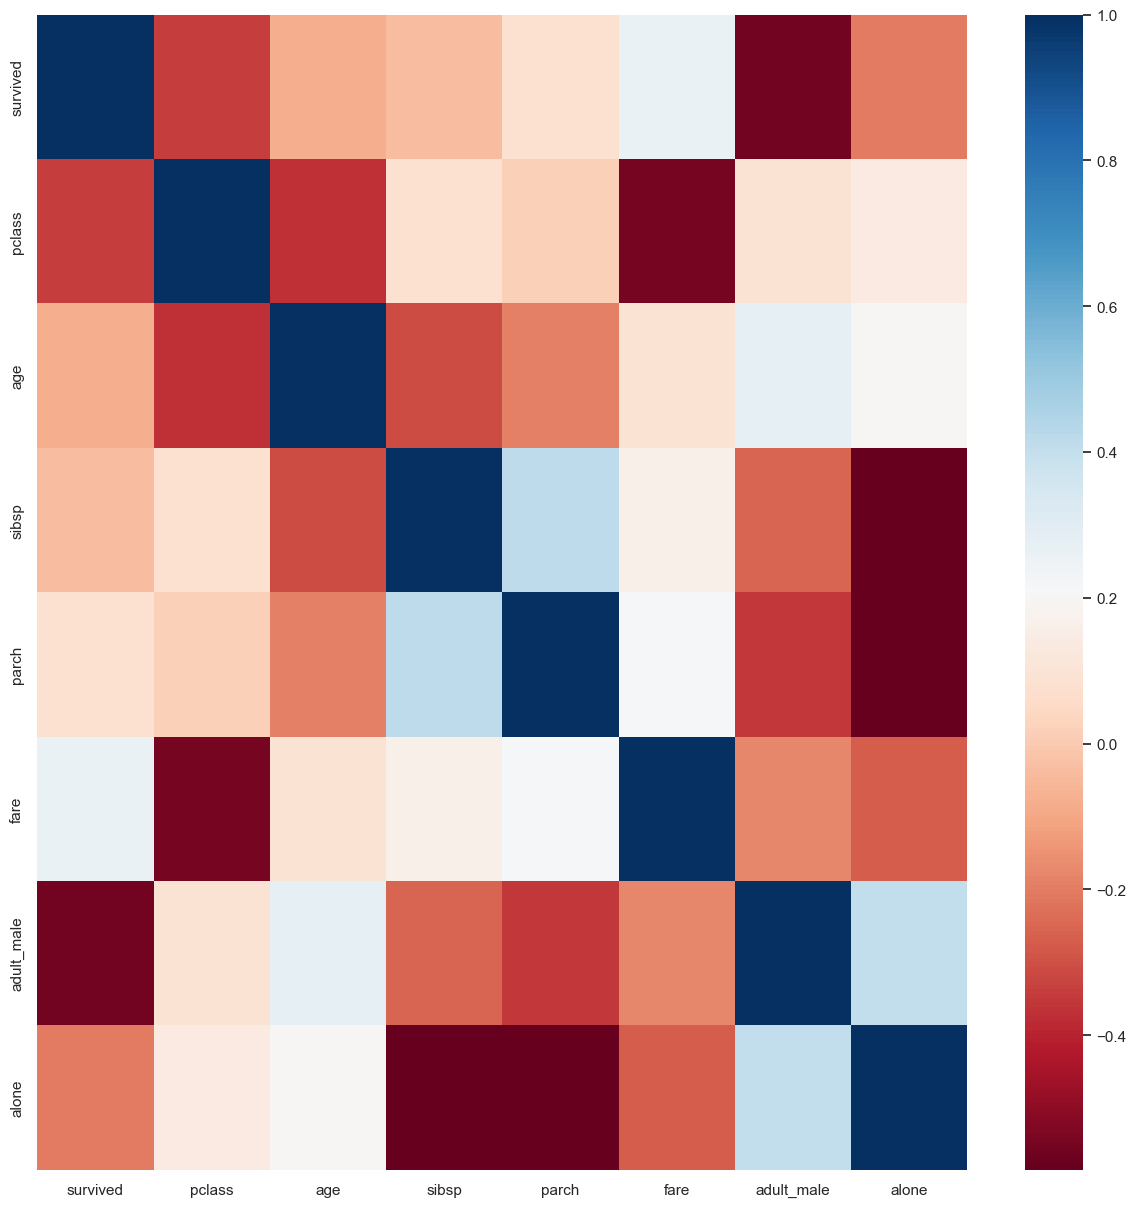

[]

In [96]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in [int, float]]
    corr = dataframe[num_cols].corr()  
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if
    any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

# Apply the function to the dataframe df
high_correlated_cols(df)
drop_list = high_correlated_cols(df, plot=True)
df.drop(drop_list, axis=1)
high_correlated_cols(df.drop(drop_list, axis=1), plot=True)
